# Image Processing Operations

This notebook walk through more image processing operations that are performed on images for advanced image processing.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Geometric Transformations
Geometric transformations involve altering the spatial relationship of pixels in an image. These operations include 
- translation (shifting the image), 
- rotation (turning the image around a point), 
- scaling (resizing the image), 
- affine transformations (mapping straight lines to straight lines), and 
- perspective transformations (correcting or altering the perspective of an image). 

These transformations are commonly used for image alignment, object detection, and perspective correction.


### Translation (cv2.warpAffine with a translation matrix): 
Shifting the image.


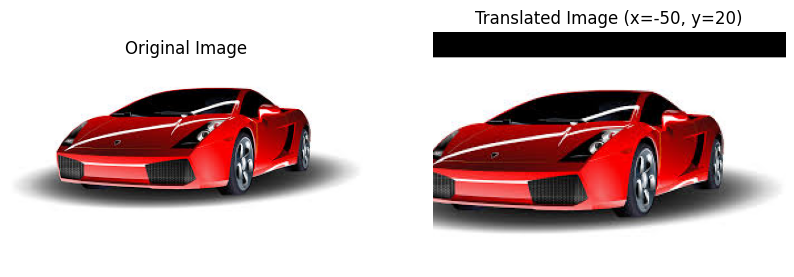

In [49]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


rows, cols, _ = image.shape
tx = -50  # Shift in x-direction (positive is right)
ty = 20  # Shift in y-direction (positive is down)
# Translation matrix: [[1, 0, tx], [0, 1, ty]]
M = np.float32([[1, 0, tx], [0, 1, ty]])
# Apply affine transformation using the translation matrix
translated_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))

# Display the translated image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title(f'Translated Image (x={tx}, y={ty})')
plt.axis('off')
plt.show()

### Rotation (cv2.getRotationMatrix2D, cv2.warpAffine): Rotating around a specified center.


(np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5))

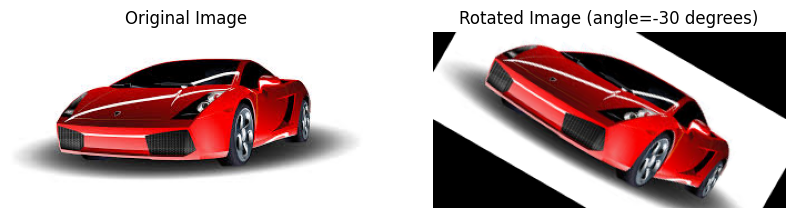

In [50]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

# Get the image dimensions
rows, cols, _ = image.shape
angle = -30  # Rotation angle in degrees (counter-clockwise)
center = (cols / 2, rows / 2)  # Center of rotation
# Get the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1)  # (center, angle, scale)
# Apply affine transformation using the rotation matrix
rotated_image = cv2.warpAffine(image, M, (cols, rows))

# Display the rotated image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title(f'Rotated Image (angle={angle} degrees)')
plt.axis('off')

### Scaling (cv2.resize): Changing the size of the image.

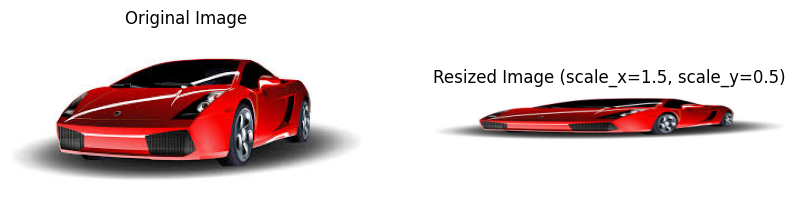

In [51]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


scale_x = 1.5
scale_y = 0.5
# Resize the image
resized_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

# Display the resized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title(f'Resized Image (scale_x={scale_x}, scale_y={scale_y})')
plt.axis('off')
plt.show()

### Affine Transformation (cv2.getAffineTransform, cv2.warpAffine): Mapping three points to their new locations.

An affine transformation preserves parallelism of lines. To define an affine transformation, you need three corresponding points in the original image and the desired locations of these three points in the output image.

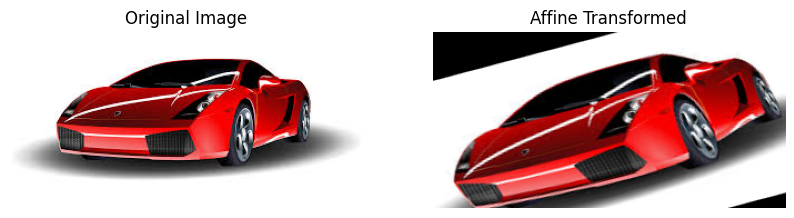

In [57]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off') # Hide axes


# Get the image dimensions
rows, cols, ch = image.shape

# Define three points in the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the corresponding three points in the output image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Get the affine transformation matrix
M = cv2.getAffineTransform(pts1, pts2)

# Apply the affine transformation
dst = cv2.warpAffine(image, M, (cols, rows))

# Display the transformed image
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Affine Transformed')
plt.axis('off')
plt.show()

### Perspective Transformation (cv2.getPerspectiveTransform, cv2.warpPerspective): Correcting perspective using four point correspondences.
A perspective transformation can correct for perspective distortion. 
To define a perspective transformation, you need four corresponding points in the original image and their desired locations in the output image. 
The lines that are straight in the original image will remain straight in the transformed image.


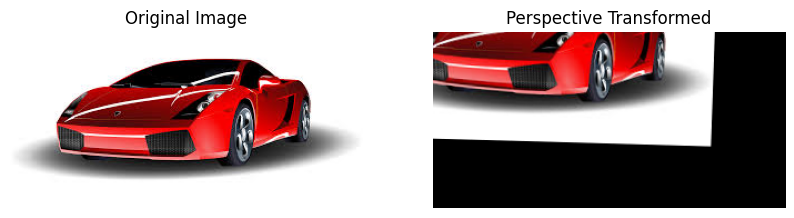

In [59]:

# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off') # Hide axes

# Get the image dimensions
rows, cols, ch = image.shape

# Define four points in the original image (corners of a quadrilateral)
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])

# Define the corresponding four points in the output image (forming a rectangle)
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

# Get the perspective transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation
dst = cv2.warpPerspective(image, M, (cols, rows))
# Display the transformed image
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)), plt.title('Perspective Transformed')
plt.axis('off')
plt.show()

### Flipping (cv2.flip): Flipping horizontally, vertically, or both.


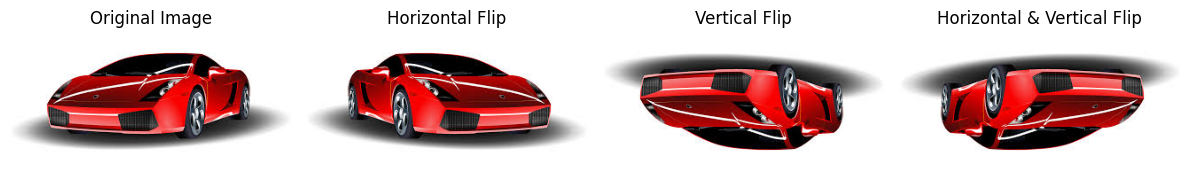

In [ ]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


# Flip horizontally
flipped_horizontal = cv2.flip(image, 1)
# Flip vertically
flipped_vertical = cv2.flip(image, 0)
# Flip both horizontally and vertically
flipped_both = cv2.flip(image, -1)

# Display the flipped images
plt.subplot(2, 4, 2), plt.imshow(cv2.cvtColor(flipped_horizontal, cv2.COLOR_BGR2RGB)), plt.title('Horizontal Flip'), plt.axis('off')
plt.subplot(2, 4, 3), plt.imshow(cv2.cvtColor(flipped_vertical, cv2.COLOR_BGR2RGB)), plt.title('Vertical Flip'), plt.axis('off')
plt.subplot(2, 4, 4), plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB)), plt.title('Horizontal & Vertical Flip'), plt.axis('off')
plt.tight_layout()
# plt.show()


## 2. Image Filtering



### Average Blurring (cv2.blur): Smoothing by averaging neighbors.


(np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5))

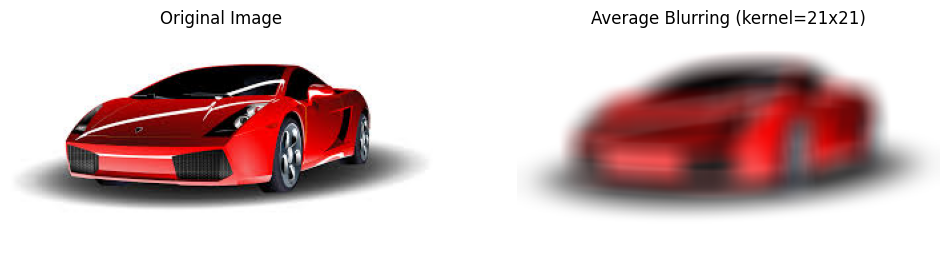

In [78]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


kernel_size = 21  # Size of the kernel (must be odd)
blurred_image = cv2.blur(image, (kernel_size, kernel_size))

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Average Blurring (kernel={kernel_size}x{kernel_size})')
plt.axis('off')


### Gaussian Blurring (cv2.GaussianBlur): Smoothing with a Gaussian kernel (more natural).

In [1]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

# Gaussian Blurring
kernel_size = 21  # Size of the kernel (must be odd)
sigma_x = 2.5  # Standard deviation in X direction
blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma_x)

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Gaussian Blurring (kernel={kernel_size}x{kernel_size}, sigma_x={sigma_x})')
plt.axis('off')
plt.show()

NameError: name 'cv2' is not defined

### Median Blurring (cv2.medianBlur): Effective for salt-and-pepper noise.


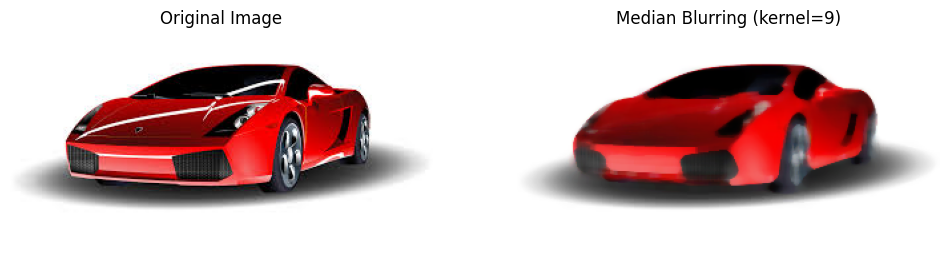

In [80]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


# Median Blurring
kernel_size = 9
median_blurred = cv2.medianBlur(image, kernel_size)

# Display the blurred image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title(f'Median Blurring (kernel={kernel_size})')
plt.axis('off')
plt.show()

### Bilateral Filtering (cv2.bilateralFilter): Edge-preserving smoothing.


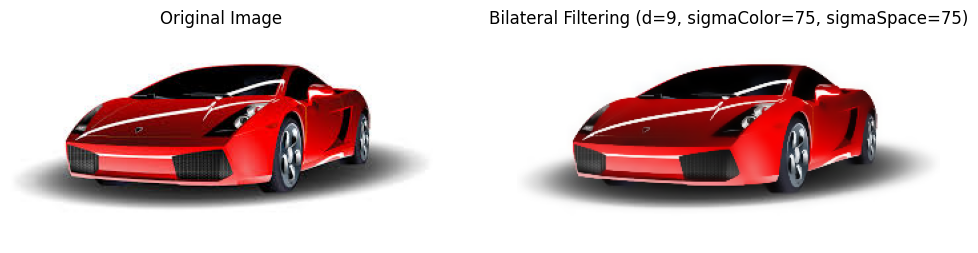

In [81]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

# Bilateral Filtering
d = 9  # Diameter of the pixel neighborhood
sigma_color = 75
sigma_space = 75
bilateral_filtered = cv2.bilateralFilter(image, d, sigma_color, sigma_space)

# Display the filtered image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
plt.title(f'Bilateral Filtering (d={d}, sigmaColor={sigma_color}, sigmaSpace={sigma_space})')
plt.axis('off')
plt.show()

### Sharpening (achieved through convolution with a sharpening kernel): Enhancing edges.



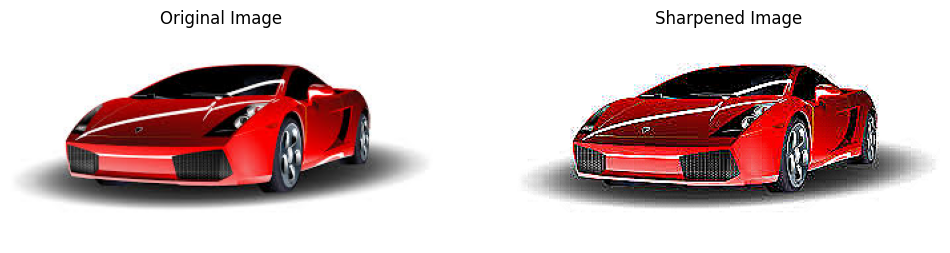

In [84]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


# Define the sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], np.float32)

# Apply the convolution using filter2D
sharpened_image = cv2.filter2D(image, -2, sharpen_kernel)
# Display the sharpened image
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)), plt.title('Sharpened Image')
plt.axis('off')
plt.show()


## 3. Color Manipulation

### Color Space Conversion (cv2.cvtColor): Converting between RGB, Grayscale, HSV, LAB, etc.


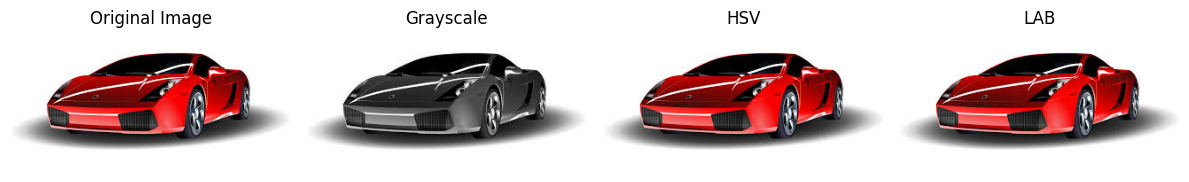

Grayscale image shape: (159, 318)
HSV image shape: (159, 318, 3)
LAB image shape: (159, 318, 3)


In [ ]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


# Convert BGR to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert BGR to HSV (Hue, Saturation, Value)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert BGR to LAB (Luminosity, A channel, B channel)
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Display the converted images
plt.subplot(2, 4, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)) # Convert HSV to RGB for display
plt.title('HSV')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(image_lab, cv2.COLOR_LAB2RGB)) # Convert LAB to RGB for display
plt.title('LAB')
plt.axis('off')

plt.tight_layout()  

print(f"Grayscale image shape: {image_gray.shape}")
print(f"HSV image shape: {image_hsv.shape}")
print(f"LAB image shape: {image_lab.shape}")

### Brightness and Contrast Adjustment (direct pixel manipulation or cv2.convertScaleAbs)
- Brightness - the overall lightness and 
- contrast - the difference between light and dark areas.
- cv2.convertScaleAbs() performs the operation output = |alpha * input + beta|.


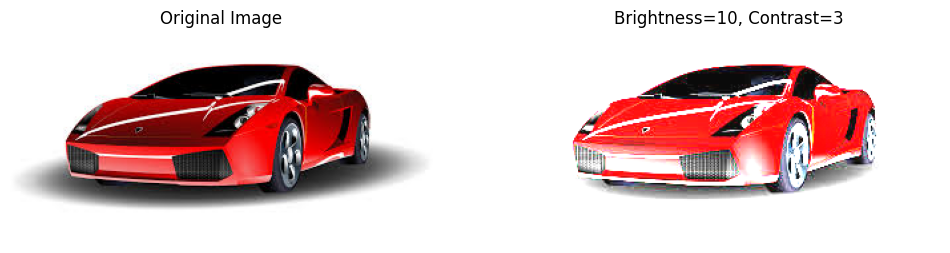

In [14]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


alpha = 3  # Contrast control (1.0-3.0)
beta = 10    # Brightness control (0-100)

# new_image = alpha * image + beta
# more robust way to handle overflow:
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# display the new image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title(f'Brightness={beta}, Contrast={alpha}')
plt.axis('off')
plt.show()

### Channel Extraction and Merging (cv2.split, cv2.merge): Working with individual color channels.



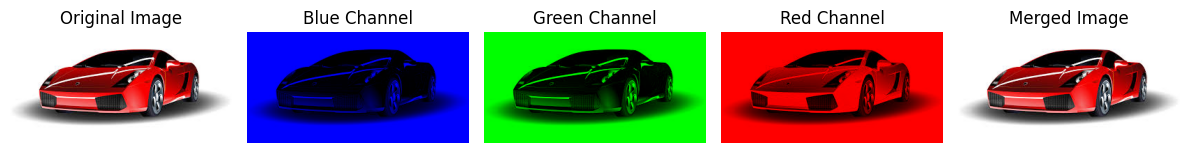

In [18]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

# Split the image into its BGR channels
b, g, r = cv2.split(image)

# Create images with only one channel
blue_channel = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])
green_channel = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
red_channel = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
merged_image = cv2.merge([b, g, r]) # Merging back the channels

# Display the individual channels and the merged image
plt.subplot(1, 5, 2), plt.imshow(cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB)), plt.title('Blue Channel'), plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB)), plt.title('Green Channel'), plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB)), plt.title('Red Channel'), plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB)), plt.title('Merged Image'), plt.axis('off')
plt.tight_layout()
plt.show()

## 4. Image Histograms

### Histogram Calculation (cv2.calcHist): Getting the frequency distribution of pixel values.


Text(0, 0.5, 'Frequency')

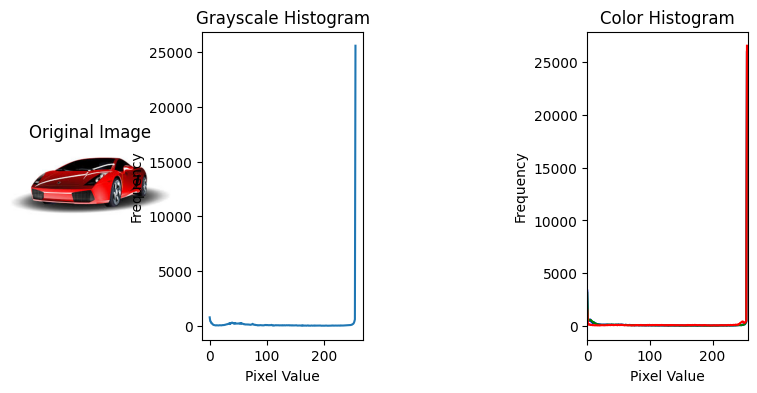

In [26]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
plt.subplot(1, 5, 2)
plt.plot(hist)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.subplot(1, 5, 4)
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# plt.show()

### Histogram Equalization (cv2.equalizeHist): Improving contrast in grayscale images.

Histogram equalization enhances the contrast of the image by redistributing the intensity values. It is particularly useful for images with poor contrast. This function computes the histogram of the grayscale image and applies a transformation to equalize the histogram. The result is a new image with improved contrast.

The pixel values are spread out more evenly across the range, making the dark areas lighter and the light areas darker. This can help to reveal more details in the image. However, it is important to note that histogram equalization can sometimes introduce noise or artifacts in the image, especially in areas with low pixel intensity.

### Applications
- Preprocessing step before applying other image processing techniques, such as edge detection or segmentation.
- Commonly used in medical imaging, satellite imagery, and other applications where contrast enhancement is needed.

### Input and Output
- **Input**: A single-channel image (grayscale).
- **Output**: The equalized image.

### Steps in Histogram Equalization
1. Compute the histogram of the input image.
2. Compute the cumulative distribution function (CDF) of the histogram.
3. Normalize the CDF to the range [0, 255].
4. Map the pixel values of the input image to the new pixel values using the normalized CDF.
5. Create the output image using the mapped pixel values.

The result is an image with improved contrast and visibility of details. The pixel values are spread out more evenly across the range, making the dark areas lighter and the light areas darker. This can help to reveal more details in the image.


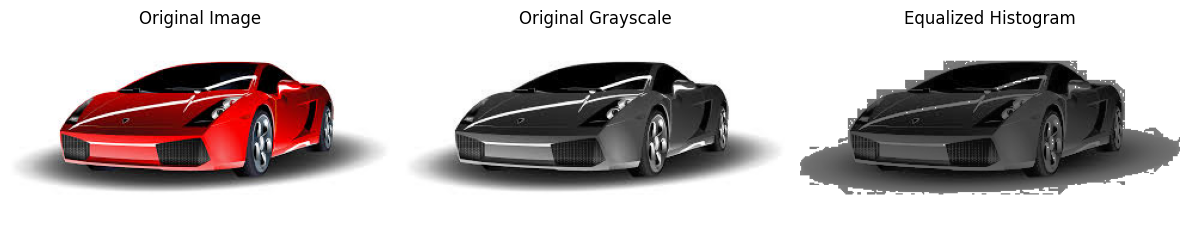

In [29]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image_gray)

plt.subplot(1, 3, 2), plt.imshow(image_gray, cmap='gray'), plt.title('Original Grayscale'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Histogram'), plt.axis('off')
plt.tight_layout()

### Adaptive Histogram Equalization (CLAHE - cv2.createCLAHE, clahe.apply): Equalizing contrast in local regions, useful for avoiding over-amplification of noise.

Adaptive Histogram Equalization (AHE) enhances the contrast of an image by dividing it into small tiles and applying histogram equalization to each tile independently. 

This method avoids over-amplification of noise in homogeneous regions. CLAHE (Contrast Limited AHE) further improves this by limiting the contrast amplification to reduce noise. 

It is particularly useful for medical imaging and low-light conditions.

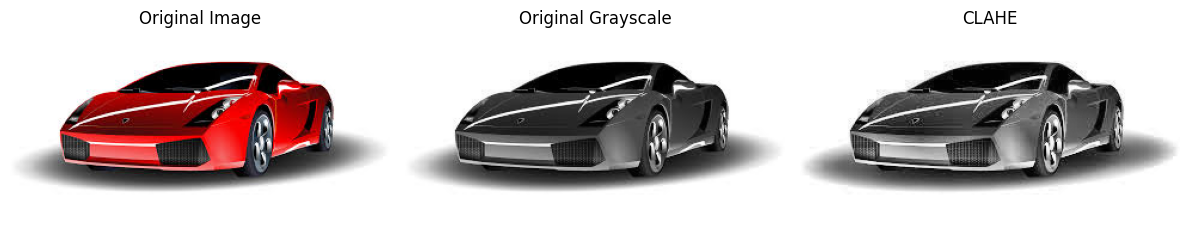

In [31]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image_gray)

plt.subplot(1, 3, 2), plt.imshow(image_gray, cmap='gray'), plt.title('Original Grayscale'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(clahe_image, cmap='gray'), plt.title('CLAHE'), plt.axis('off')
plt.tight_layout()


## 5. Image Segmentation

Image segmentation is the process of partitioning an image into multiple segments or regions to simplify its representation and make it more meaningful for analysis. 

It is used to locate objects, boundaries, or specific regions of interest within an image. 

Segmentation techniques can be based on 
- pixel intensity, 
- color, 
- texture, or other features, and 
- are widely applied in fields like medical imaging, object detection, and computer vision.



### Thresholding (cv2.threshold, cv2.adaptiveThreshold): Creating binary images based on pixel intensity.

(<Axes: title={'center': 'Adaptive Thresholding'}>,
 Text(0.5, 1.0, 'Adaptive Thresholding'),
 (np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5)))

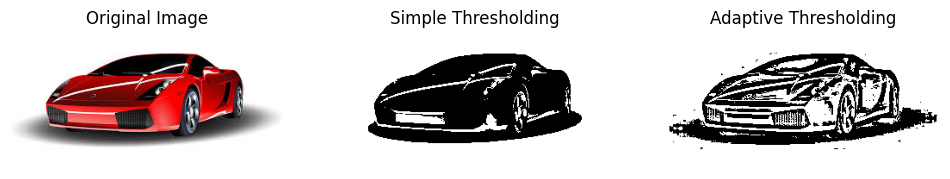

In [94]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply simple thresholding
ret, thresh1 = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY) # Adjust threshold value (127) as needed

# Apply adaptive thresholding
thresh2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) # Adjust block size (11) and C (2)

# Display the results
plt.subplot(1, 3, 2), plt.imshow(thresh1, cmap='gray'), plt.title('Simple Thresholding'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(thresh2, cmap='gray'), plt.title('Adaptive Thresholding'), plt.axis('off')

### Color-based Segmentation (using masks created based on color ranges in different color spaces like HSV): Isolating objects based on their color.

Color-based segmentation involves isolating objects in an image based on their color. This is typically achieved by converting the image to a different color space, such as HSV (Hue, Saturation, Value), and creating masks based on specific color ranges. The steps include:

1. **Convert the image to HSV color space**: HSV is often preferred because it separates color information (hue) from intensity (value), making it easier to define color ranges.
2. **Define the color range**: Specify the lower and upper bounds for the desired color in the HSV space.
3. **Create a mask**: Use the `cv2.inRange()` function to create a binary mask where pixels within the specified range are white (255) and others are black (0).
4. **Apply the mask**: Use the mask to extract the desired region from the original image using bitwise operations.

This technique is widely used in applications like object detection, tracking, and image analysis.

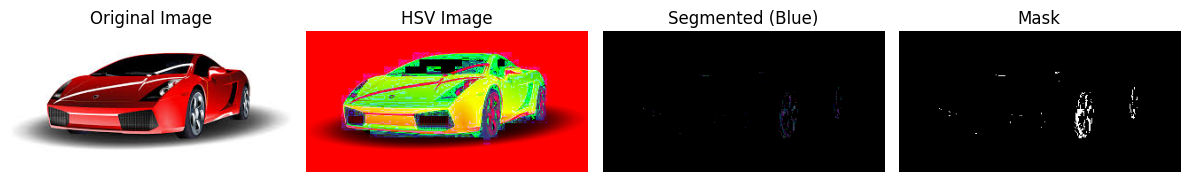

In [58]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for a color (e.g., blue)
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask based on the color range
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image_hsv, mask=mask)

# Display the segmented image
plt.subplot(1, 4, 2), plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_BGR2RGB)), plt.title('HSV Image'), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented (Blue)'), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)), plt.title('Mask'), plt.axis('off')
plt.tight_layout()

### Watershed Algorithm (cv2.watershed, requires marker image): Separating touching objects.

The Watershed Algorithm is a region-based segmentation technique that treats the grayscale image as a topographic surface. Pixels with high intensity represent peaks, and pixels with low intensity represent valleys. The algorithm "floods" the valleys starting from predefined markers, separating regions based on the topography. It is particularly useful for separating touching or overlapping objects in an image.


(np.float64(-0.5), np.float64(317.5), np.float64(158.5), np.float64(-0.5))

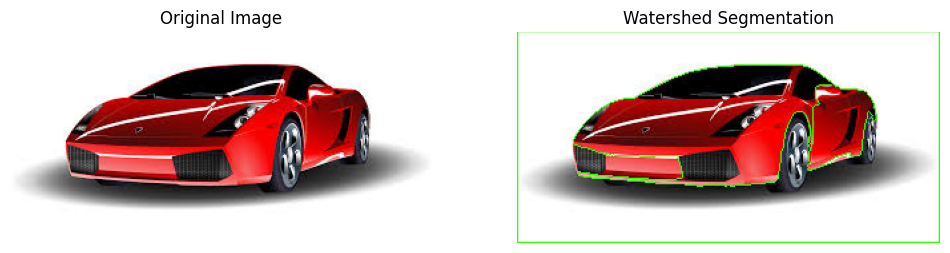

In [76]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes



image_bgr = cv2.copyTo(image, None)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Add one so that the background is not 0 but 1
markers[unknown == 255] = 0  # Mark the region of unknown with 0

markers = cv2.watershed(image_bgr, markers)
image_bgr[markers == -1] = [0, 255, 50]  # Color the boundary regions in red

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')

### GrabCut Algorithm (cv2.grabCut, for interactive foreground extraction): Segmenting an object with user interaction (bounding box or scribbles).




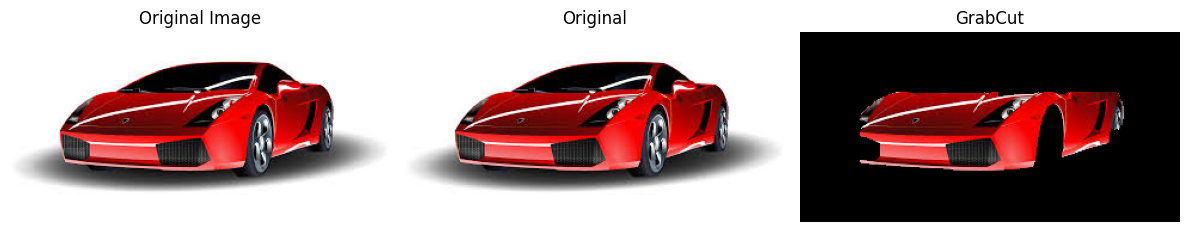

In [78]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes

# Initialize mask and models
mask = np.zeros(image.shape[:2], np.uint8)  # Mask initialized to zeros
rect = (50, 50, 450, 290)  # Define a rectangle around the foreground object
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]
# Display the segmented image
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title('GrabCut'), plt.axis('off')
plt.tight_layout()

In [ ]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off') # Hide axes


## 6. Morphological Operations


### Erosion (cv2.erode): Shrinking foreground objects.


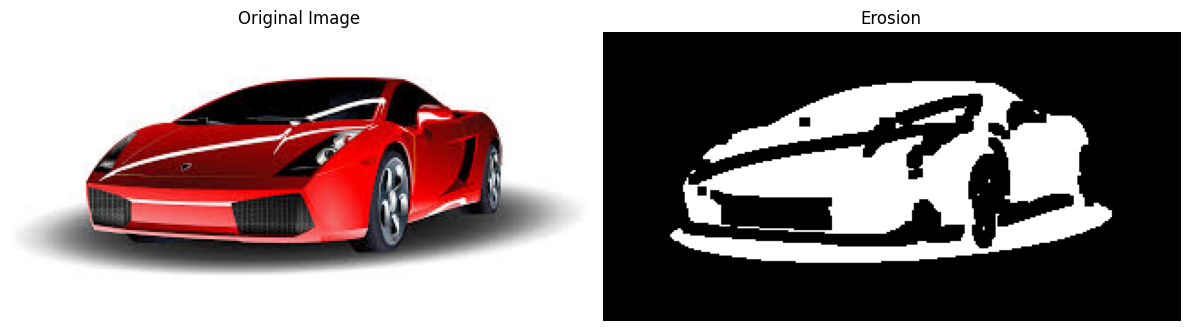

In [105]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
# Apply binary thresholding
ret, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
erosion = cv2.erode(binary_image, kernel, iterations=1)

# Display the result
plt.subplot(1,2,2), plt.imshow(erosion, cmap='gray'), plt.title('Erosion'), plt.axis('off')
plt.tight_layout()

### Dilation (cv2.dilate): Expanding foreground objects.


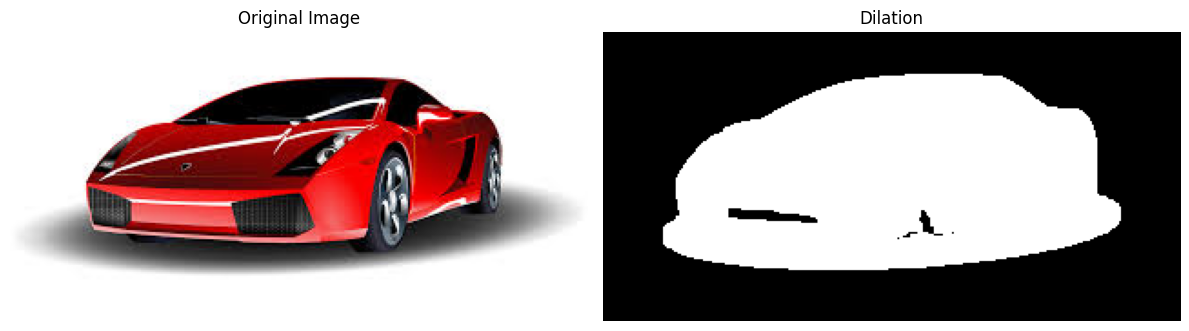

In [106]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Apply dilation
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# Display the result
plt.subplot(1,2,2), plt.imshow(dilation, cmap='gray'), plt.title('Dilation'), plt.axis('off')
plt.tight_layout()

### Opening (cv2.morphologyEx with cv2.MORPH_OPEN): Erosion followed by dilation (removes small objects).


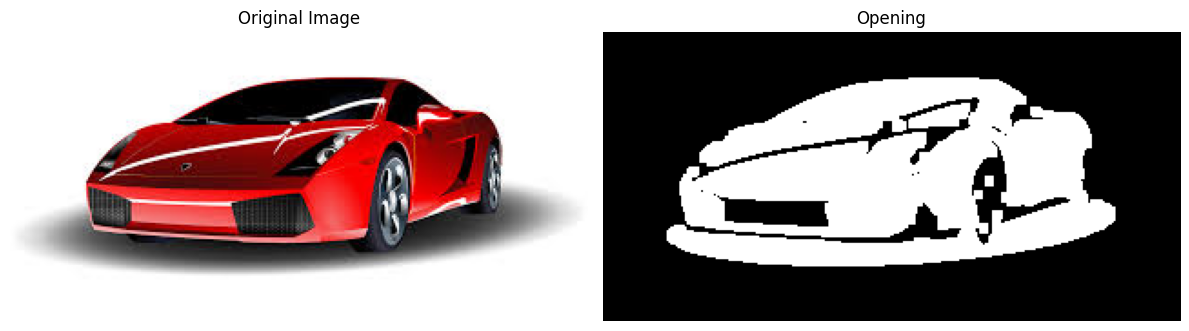

In [113]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Apply opening (erosion followed by dilation)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Display the result
plt.subplot(1,2,2) ,plt.subplot(1,2,2), plt.imshow(opening, cmap='gray'), plt.title('Opening'), plt.axis('off')
plt.tight_layout()

### Closing (cv2.morphologyEx with cv2.MORPH_CLOSE): Dilation followed by erosion (fills small holes).


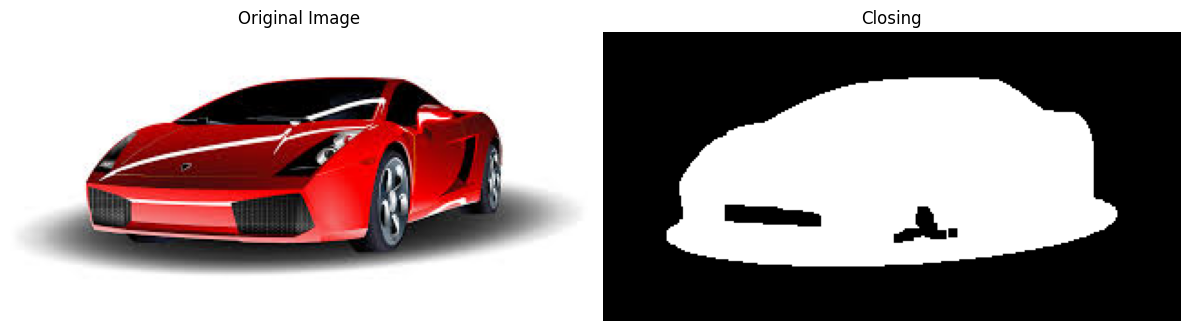

In [115]:
# Load an image
image = cv2.imread('image.jpeg')


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Load a binary image
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Define a kernel
kernel = np.ones((5, 5), np.uint8)

# Apply closing (dilation followed by erosion)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display the result
plt.subplot(1,2,2), plt.imshow(closing, cmap='gray'), plt.title('Closing'), plt.axis('off')
plt.tight_layout()

### Morphological Gradient (cv2.morphologyEx with cv2.MORPH_GRADIENT): Highlights the boundaries of objects.

The morphological gradient is the difference between the dilation and erosion of an image. 

It highlights the edges of the objects.


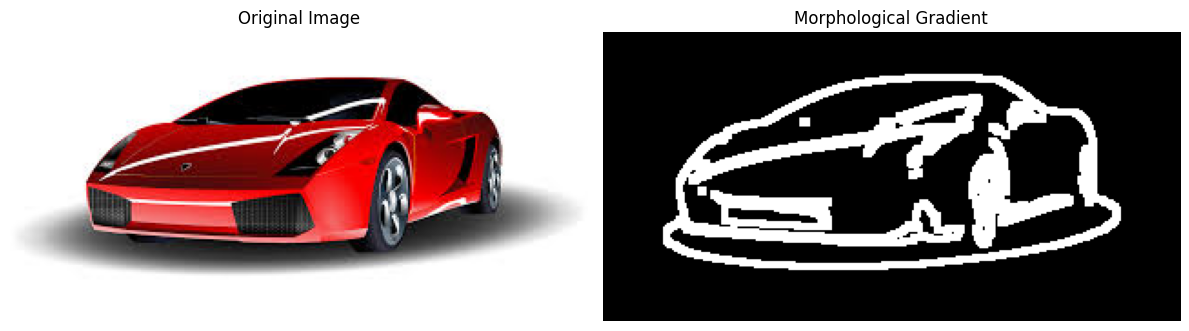

In [ ]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, binary_image = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

plt.subplot(1,2,2), plt.imshow(gradient, cmap='gray'), plt.title('Morphological Gradient'), plt.axis('off')
plt.tight_layout()

### Top Hat (cv2.morphologyEx with cv2.MORPH_TOPHAT): Highlights small bright objects.

Top Hat is the difference between the original image and its opening. 

It highlights small bright objects that are smaller than the kernel.

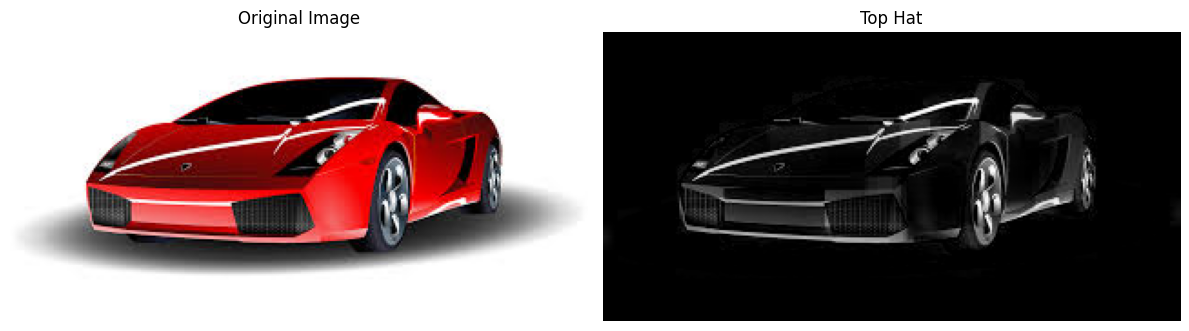

In [ ]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((15, 15), np.uint8)
tophat = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, kernel)

plt.subplot(1,2,2), plt.imshow(tophat, cmap='gray'), plt.title('Top Hat'), plt.axis('off')
plt.tight_layout()

### Black Hat (cv2.morphologyEx with cv2.MORPH_BLACKHAT): Highlights small dark objects.

Black Hat is the difference between the closing of the image and the original image. 

It highlights small dark objects that are smaller than the kernel.

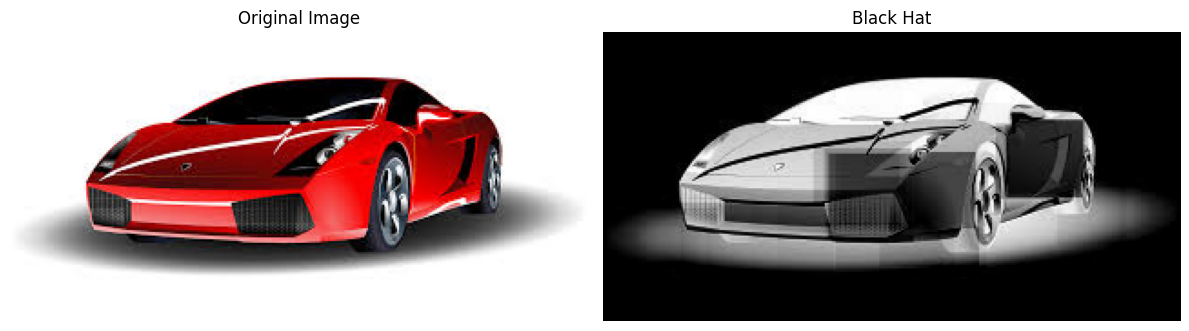

In [104]:
# Load an image
image = cv2.imread('image.jpeg')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off') # Hide axes

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((31, 31), np.uint8)
blackhat = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(1,2,2), plt.imshow(blackhat, cmap='gray'), plt.title('Black Hat'), plt.axis('off')
plt.tight_layout()